Лабораторная Кузнецовой Екатерины

Данные: https://archive.ics.uci.edu/ml/datasets/BLOGGER 

Был проведен опрос среди блогеров, затем полученные данные анализируются вместе с их веб-страницами. В качестве вопросов рассматривались следующие параметры: возраст, образование, политические установки, тема блога, и тип блогера в интернете, влияние неэффективных СМИ на тенденцию и др. БД уже обработана от шумов и нерелевантных данных.
Окончательные признаки: образование, политические тенденции, темы, местные СМИ (LMT) и локальное, политическое и социальное пространство (LPS). 
Блогеры разделяются на  2 класса: профессиональные и сезонные (временные).
Профессиональные блогеры (Pro Bloggers, PB) -это те, кто принимает блог как эффективные цифровые средства массовой информации, они ведут свой блог какое-то непрерывное время. Сезонные (временные) блогеры - это не профессионалы, они следят за блогом лишь в дискретные промежутки времени. 

Задача: необходимо классифицировать блогеров на профессиональных и сезонных. 

In [2]:
#подключаем библиотеки
import numpy as np # большие многомерные массивы и матрицы, мат. функции для операций с этими данными
import matplotlib.pyplot as plt # визуализация данных 2D-графикой (3D тоже поддерживается)
import pandas as pd # анализ и обработка данных (таблицы DataFrame)
%matplotlib inline 
#from sklearn import preprocessing # алгоритмы машинного обучения
#from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [3]:
#считывание файла

data = pd.read_csv('kohkiloyeh.csv', engine = 'python',delimiter=',')

In [4]:
data.shape

(100, 6)

In [5]:
data.head()

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes


In [6]:
data.tail()

,Degree,caprice,topic,lmt,lpss,pb
95,medium,middle,impression,yes,yes,yes
96,low,middle,impression,yes,no,no
97,low,right,impression,yes,no,no
98,medium,right,news,yes,yes,no
99,medium,left,impression,yes,yes,yes


Attribute Information:

* Degree - education
* caprice - political caprice
* topic - topics
* lmt -  local media turnover (LMT)
* lpss - local, political and social space (LPSS)
* pb - professional bloggers


In [7]:
data.at[0, 'Degree']

'high'

In [8]:
data['Degree']

0       high
1       high
2     medium
3       high
4     medium
5     medium
6       high
7       high
8       high
9     medium
10      high
11    medium
12      high
13       low
14      high
15    medium
16    medium
17      high
18    medium
19      high
20      high
21    medium
22      high
23       low
24      high
25      high
26       low
27      high
28      high
29    medium
       ...  
70    medium
71    medium
72    medium
73       low
74      high
75      high
76       low
77      high
78      high
79    medium
80      high
81       low
82    medium
83       low
84      high
85    medium
86    medium
87    medium
88    medium
89    medium
90      high
91    medium
92      high
93    medium
94    medium
95    medium
96       low
97       low
98    medium
99    medium
Name: Degree, Length: 100, dtype: object

In [9]:
data.describe(include = [object]) 
data_describe = data.describe(include = [object])
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object'] 
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object'] 
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

print(categorical_columns) 
print(numerical_columns) 



['Degree', 'caprice', 'topic', 'lmt', 'lpss', 'pb']
[]


In [10]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)


['lmt', 'lpss', 'pb'] ['Degree', 'caprice', 'topic']


In [11]:
#обработка бинарных признаков

data.at[data['lmt'] == 'yes', 'lmt'] = 1
data.at[data['lmt'] == 'no', 'lmt'] = 0
data.at[data['lpss'] == 'yes', 'lpss'] = 1
data.at[data['lpss'] == 'no', 'lpss'] = 0
data.at[data['pb'] == 'yes', 'pb'] = 1
data.at[data['pb'] == 'no', 'pb'] = 0

#обработка небинарных признаков, векторизация

data['Degree'].unique()

data['caprice'].unique()

data['topic'].unique()

array(['impression', 'political', 'tourism', 'news', 'scientific'],
      dtype=object)

In [12]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Degree_high', 'Degree_low', 'Degree_medium', 'caprice_left',
       'caprice_middle', 'caprice_right', 'topic_impression', 'topic_news',
       'topic_political', 'topic_scientific', 'topic_tourism'],
      dtype='object')


In [13]:
data_nonbinary.head()

,Degree_high,Degree_low,Degree_medium,caprice_left,caprice_middle,caprice_right,topic_impression,topic_news,topic_political,topic_scientific,topic_tourism
0,1,0,0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,1,0,0,1,0,0,0


In [14]:
#соединяем всё в одну таблицу
data_numerical = data[numerical_columns]
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)



(100, 14)


In [15]:
data.head()


,Degree_high,Degree_low,Degree_medium,caprice_left,caprice_middle,caprice_right,topic_impression,topic_news,topic_political,topic_scientific,topic_tourism,lmt,lpss,pb
0,1,0,0,1,0,0,1,0,0,0,0,1,1,1
1,1,0,0,1,0,0,0,0,1,0,0,1,1,1
2,0,0,1,0,1,0,0,0,0,0,1,1,1,1
3,1,0,0,1,0,0,0,0,1,0,0,1,1,1
4,0,0,1,0,1,0,0,1,0,0,0,1,1,1


In [16]:
#матрицу корреляций ищем 
corr = data.corr()
corr 

,Degree_high,Degree_low,Degree_medium,caprice_left,caprice_middle,caprice_right,topic_impression,topic_news,topic_political,topic_scientific,topic_tourism
Degree_high,1.000000,-0.322613,-0.752971,0.193697,-0.322613,0.032028,-0.113293,-0.282736,0.616828,-0.219369,-0.221059
Degree_low,-0.322613,1.000000,-0.379949,-0.189207,0.003322,0.197115,0.178147,-0.048485,-0.175224,0.115212,-0.008071
Degree_medium,-0.752971,-0.379949,1.000000,-0.057750,0.312967,-0.168339,-0.013136,0.310015,-0.480981,0.134282,0.221644
caprice_left,0.193697,-0.189207,-0.057750,1.000000,-0.419948,-0.747048,0.024371,-0.095922,0.117502,0.028242,-0.100901
caprice_middle,-0.322613,0.003322,0.312967,-0.419948,1.000000,-0.289589,0.178147,0.171903,-0.296068,0.002259,-0.008071
caprice_right,0.032028,0.197115,-0.168339,-0.747048,-0.289589,1.000000,-0.156194,-0.024753,0.092943,-0.031440,0.112328
topic_impression,-0.113293,0.178147,-0.013136,0.024371,0.178147,-0.156194,1.000000,-0.272166,-0.412360,-0.154172,-0.236067
topic_news,-0.282736,-0.048485,0.310015,-0.095922,0.171903,-0.024753,-0.272166,1.000000,-0.355395,-0.132875,-0.203456
topic_political,0.616828,-0.175224,-0.480981,0.117502,-0.296068,0.092943,-0.412360,-0.355395,1.000000,-0.201319,-0.308257
topic_scientific,-0.219369,0.115212,0.134282,0.028242,0.002259,-0.031440,-0.154172,-0.132875,-0.201319,1.000000,-0.115251


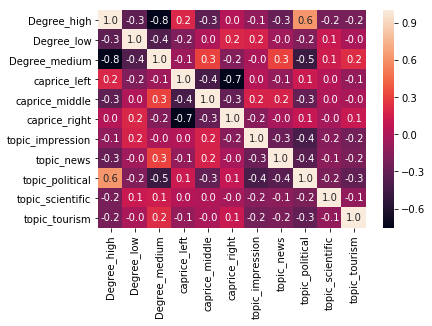

In [16]:
import seaborn as sns
sns.heatmap(corr, annot=True, fmt=".1f");

Видим из матрицы, что максимальная корреляция у признаков topic_political и Degree_high (т.е. для ведения
политических блогов важно наличие высшего образования), минимальная же со всеми признаками корреляция у 
признака topic_scientific(т.е. научные темы особо не связаны с другими признаками). Однако в данном случае при удалении
признаков результат улучшен не будет, поэтому все признаки остаются. 

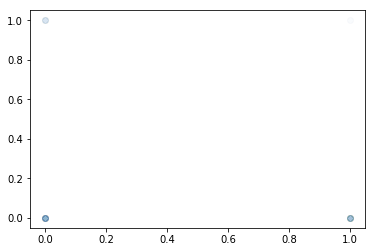

In [69]:
plt.plot(data['Degree_high'], data['topic_tourism'], 'o', alpha = 0.01);

In [17]:
# подготовка данных к работе алгоритма KNN, нормализация в данной задаче не требуется. 
# Нужно отделить столбец, отвечающий за классы(а именно pb), и остальные данные поделить на обучающую и тестовую выборку. 
Y = data['pb'] 
X = data.drop(('pb'), axis = 1) 
print(X.shape) 
print(Y.shape) 

(100, 13)
(100,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

75 25


In [19]:
#алгоритм K-ближайших соседей. Возьмем количество соседей = 5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)


In [37]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [39]:
Y_train = Y_train.astype(bool)
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)

#err_train = np.mean(Y_train != Y_train_predict)
#err_test  = np.mean(Y_test  != Y_test_predict)

#print(err_train, err_test)

In [40]:
err_train = np.mean(Y_train != Y_train_predict)
err_test  = np.mean(Y_test  != Y_test_predict)

print(err_train, err_test)

0.14666666666666667 0.36


In [42]:
from sklearn.metrics import confusion_matrix
Y_test = Y_test.astype(bool)
print(confusion_matrix(Y_test, Y_test_predict))

[[ 2  5]
 [ 4 14]]


In [46]:
# ПОДБОР ПАРАМЕТРОВ
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 5, 7, 9, 13, 17, 19, 21, 25, 27, 29, 30, 33, 35, 39, 45, 50, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.12 1


In [47]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

0.05333333333333334 0.32


In [64]:
k = range(1, 55, 2)
list_err_train = []
list_err_test = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    list_err_train.append(np.mean(Y_train != knn.predict(X_train)))
    list_err_test.append(np.mean(Y_test  != knn.predict(X_test)))
    print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53


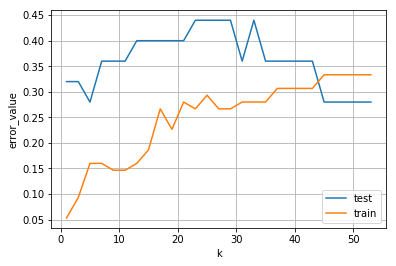

In [65]:
plt.plot(k, list_err_test, label='test')
plt.plot(k, list_err_train, label='train')
plt.xlabel('k')
plt.ylabel('error_value')
plt.legend(loc='lower right')
plt.grid()

In [48]:
# SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

err_train = np.mean(Y_train != svc.predict(X_train))
err_test  = np.mean(Y_test  != svc.predict(X_test))

print(err_train, err_test)

0.13333333333333333 0.32


In [49]:
# Подбор параметров
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-6, 6)
gamma_array = 10.**np.arange(-6, 6)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\Users\kater\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kater\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.09333333333333338 1000.0


In [50]:
svc = SVC(C = best_C).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

0.05333333333333334 0.32


In [51]:
# Random Forest
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, Y_train)

err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))

print(err_train, err_test)

0.05333333333333334 0.36


In [52]:
# Значимость признаков
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

N, d = X_train.shape
feature_names = X.columns
for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'caprice_right' (0.149247)
 2. feature 'Degree_low' (0.140795)
 3. feature 'caprice_left' (0.117886)
 4. feature ' lpss' (0.109519)
 5. feature 'topic_scientific' (0.092964)
 6. feature '  lmt' (0.062125)
 7. feature 'Degree_medium' (0.060028)
 8. feature 'topic_political' (0.053964)
 9. feature 'Degree_high' (0.051037)
10. feature 'topic_tourism' (0.043221)
11. feature 'caprice_middle' (0.041154)
12. feature 'topic_news' (0.039626)
13. feature 'topic_impression' (0.038435)


In [53]:
feature_names[[1,0,1]]

Index(['Degree_low', 'Degree_high', 'Degree_low'], dtype='object')

(-1, 13)

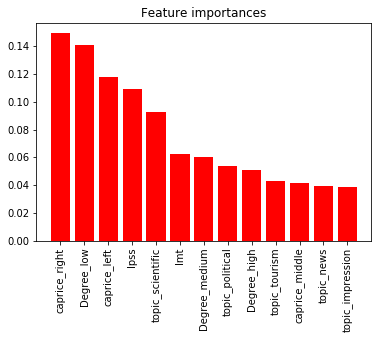

In [57]:
d_first = 13
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [58]:
# Extremely Randomized Trees
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, Y_train)

err_train = np.mean(Y_train != ert.predict(X_train))
err_test  = np.mean(Y_test  != ert.predict(X_test))

print(err_train, err_test)

0.05333333333333334 0.36


In [59]:
# AdaBoost
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, Y_train)

err_train = np.mean(Y_train != ada.predict(X_train))
err_test = np.mean(Y_test != ada.predict(X_test))

print(err_train, err_test)

0.10666666666666667 0.4


In [60]:
# GBT
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, Y_train)

err_train = np.mean(Y_train != gbt.predict(X_train))
err_test = np.mean(Y_test != gbt.predict(X_test))

print(err_train, err_test)

0.05333333333333334 0.24


ВЫВОДЫ

Для объективности выводов следует провести кросс-валидацию (при использовании cross_validation). В целом, БД небольшая (всего 100 строк), поэтому и результаты классификации не очень эффективны (на тестовой выборке ошибочно определяются от 24 до 40 процентов блогеров). И все же лучший результат показала модель GBT, а худший AdaBoost. Остальные модели имели примерно одинаковые показатели.

Определенно, высокая ошибка объясняется малым количеством данных.